# Multi-Agent Artificial Intellgience, group coursework
## Problem 2: Basic Bidding Strategies

In [9]:
import pandas as pd
with open('./data/train.csv') as csv_file: 
    df = pd.read_csv(csv_file)
list(df) 

['click',
 'weekday',
 'hour',
 'bidid',
 'userid',
 'useragent',
 'IP',
 'region',
 'city',
 'adexchange',
 'domain',
 'url',
 'urlid',
 'slotid',
 'slotwidth',
 'slotheight',
 'slotvisibility',
 'slotformat',
 'slotprice',
 'creative',
 'bidprice',
 'payprice',
 'keypage',
 'advertiser',
 'usertag']

(0.0, 358660.0)

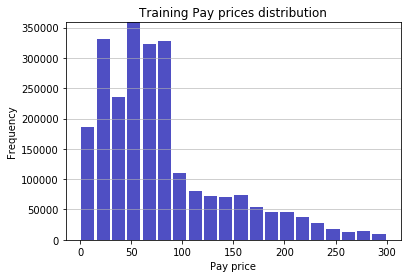

In [10]:
import matplotlib.pyplot as plt
import numpy as np  
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df.payprice, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Pay price')
plt.ylabel('Frequency')
plt.title('Training Pay prices distribution')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [11]:
# plot payprices from clicks and non clicks
pay_noclick = df.payprice[df.click == 0]
pay_click = df.payprice[df.click == 1]
both = pd.DataFrame(pay_click,pay_noclick,columns=['pay_click', 'pay_noclick'])
# print(max(both.pay_click))
# both.agg(['min', 'max', 'mean', 'std']).round(decimals=2)


In [12]:
groups = df.groupby('click')
groups.payprice.agg(['count', 'min', 'max', 'mean', 'median', 'std']).round(decimals=2)

,count,min,max,mean,median,std
click,,,,,,
0,2429188,0,300,78.13,68,59.84
1,1793,4,300,105.46,84,66.39


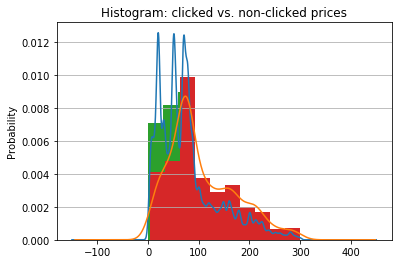

In [13]:
fig, ax = plt.subplots()
groups.payprice.plot.kde(ax=ax, legend=False, title='Histogram: clicked vs. non-clicked prices')
groups.payprice.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
# ax.set_facecolor('#d8dcd6')

 ### Optimal Constant Bid Strategy on Training set :
    

In [8]:
max_bid = 300
budget = 6250 # budget in fen 

def eval_bid(bid,dataset = df):
    # max number of wins at this bid level given budget constraint
    possible_wins = int(budget/(bid/1000))

    # Total number of wins at this bid level
    dataset['wins'] = dataset.bidprice < bid
    total_wins = dataset['wins'].sum()


    # The total number of clicks if no budget constraint with this bid level
    dataset['won_clicks'] = dataset['wins'] * dataset['click']
    max_clicks = dataset['won_clicks'].sum()
    
    # how many auctions do we actually win at this bid level:
    actual_wins = min(possible_wins,total_wins)
    
    # Expected number of clicks and ctr at this bid level
    exp_clicks = max_clicks * actual_wins/total_wins
    ctr = exp_clicks/actual_wins
    
    # Remaining budget:
    rem_budget = budget - actual_wins*bid/1000

    return bid, round(exp_clicks,1), round(ctr*100,3), round(rem_budget,2)

    
def optimal_bid(dataset=df):
    best_numclick = -1
    best_bid = -1
    
    for bid in range(1,max_bid):
        price, exp_clicks, ctr, rem_budget = eval_bid(bid,dataset)
        
        if rem_budget < bid: 
            if exp_clicks > best_numclick:
                best_numclick = exp_clicks
                best_bid = price
                best_ctr = ctr
                remaining_cash = rem_budget
            
    return best_bid,best_numclick, best_ctr, remaining_cash

####################

print(" Best bid: {} \n Expected number of clicks: {} \n CTR: {} \n Remaining cash: {} ".format(*optimal_bid()))
    

 Best bid: 53 
 Expected number of clicks: 363.6 
 CTR: 0.039 
 Remaining cash: 0.01 


In [9]:
# double checking results visually 
for bid in range(1,max_bid):
    print(eval_bid(bid))

(1, 0.0, 0.0, 49999.51)
(2, 0.0, 0.0, 49994.38)
(3, 0.0, 0.0, 49981.32)
(4, 0.0, 0.0, 49972.05)
(5, 2.0, 0.012, 49913.09)
(6, 4.0, 0.006, 49624.92)
(7, 32.0, 0.042, 49460.5)
(8, 33.0, 0.037, 49286.07)
(9, 33.0, 0.033, 49107.34)
(10, 34.0, 0.031, 48903.24)
(11, 40.0, 0.031, 48559.98)
(12, 47.0, 0.032, 48225.86)
(13, 51.0, 0.032, 47897.3)
(14, 57.0, 0.033, 47561.93)
(15, 59.0, 0.032, 47200.38)
(16, 66.0, 0.033, 46818.77)
(17, 70.0, 0.032, 46320.15)
(18, 73.0, 0.031, 45756.73)
(19, 84.0, 0.033, 45180.82)
(20, 88.0, 0.033, 44679.48)
(21, 108.0, 0.029, 42142.7)
(22, 116.0, 0.029, 41102.63)
(23, 135.0, 0.031, 39853.94)
(24, 140.0, 0.031, 39134.77)
(25, 144.0, 0.031, 38337.28)
(26, 150.0, 0.031, 37527.54)
(27, 153.0, 0.031, 36835.53)
(28, 158.0, 0.032, 36031.02)
(29, 165.0, 0.032, 35249.88)
(30, 168.0, 0.032, 34486.01)
(31, 186.0, 0.034, 33141.77)
(32, 206.0, 0.035, 31206.24)
(33, 211.0, 0.035, 30181.49)
(34, 219.0, 0.035, 28990.04)
(35, 227.0, 0.036, 27888.54)
(36, 233.0, 0.037, 27043.16)
(3

#### Notes to self: 
1. It's somewhat concerning that the optimal bid does not spend all the budget, it actually leaves a sizeable 929 fen on the table. should that not be allowed as per criteria three of evaluation or does that only apply to part 5? I have now added an if condition to make sure budget is spent totally in calcualting optimal bid. 

2. Th approach of looking at expected number of clicks can be confusing... so for 20 fen, you get 88 clicks for sure. But for 21 fen you get on average only 85.9 clicks. It sounds like you should get a numgher st least higher than 88...however, in the first case, you win every single auction that is "winnable" at 20 fen, while in the latter, you only win 80% of winnable auctions before your budget runs out, so you might get unlucky and win a lot more proportion of auctions with no clicks. 

## Evaluating strategy on Validation Set 

In [9]:
with open('./data/validation.csv') as csv_file2: 
    df_val = pd.read_csv(csv_file2)

#### Summary stats validation set

In [12]:
groups_val= df_val.groupby('click')
groups_val.payprice.agg(['count', 'min', 'max', 'mean', 'median', 'std']).round(decimals=2)

,count,min,max,mean,median,std
click,,,,,,
0,303723,0,300,78.22,68,60.02
1,202,6,300,105.72,80,68.69


##### Evaluate strategy on validation set

In [13]:
eval_bid(53,df_val)


(21, 13.0, 0.028, 5259.6)

##### What is actual optimal bid on validation set?

In [190]:
print(" Best bid: {} \n Expected number of clicks: {} \n CTR: {} \n Remaining cash: {} ".format(*optimal_bid(df_val)))

 Best bid: 53 
 Expected number of clicks: 46.0 
 CTR: 0.039 
 Remaining cash: 0.03 


#### The above shows that our strategy was overfitting the training dataset, as the optimal constant bid in the validation dataset is significantly higher, and our bid would result in poor performance and most budget not spent. 

## Optimal Rand bid strategy on training set: 

In [10]:
def eval_range(lower_bound,width, iterations, dataset = df):
    clicks = 0 
    bids = np.random.randint(lower_bound, lower_bound + width, size = iterations)
    for bid in bids:
        clicks += eval_bid(bid,dataset)[1]
    return clicks/iterations

In [11]:
num_ranges = int(300)
# using interval width as number of times we randomly sample bid from interval
# num_rand_bid = int(50)

def get_best_range(dataset = df):
    
    max_clicks = 0
    
    # Repeatedly Randomly select lower bound and width 
    for _ in range(num_ranges):
        lower_bound = np.random.randint(1,max_bid)
        width = np.random.randint(1,max_bid-lower_bound+1)
        
        # Evaluate the range by repeatedly sampling bids from it 
        avg_clicks = eval_range(lower_bound,width, width, dataset)
        
        # Compare current range results to previous best range in terms of average expected clicks
        if avg_clicks > max_clicks:
            best_range = [lower_bound,lower_bound+width]
            max_clicks = avg_clicks
            
    return best_range, round(max_clicks)

print(" Best interval: {} \n Expected number of clicks: {}".format(*get_best_range(df)))
    

 Best interval: [48, 54] 
 Expected number of clicks: 344.0


#### What is actual optimal range for Rand strategy on Validation set ? 

In [18]:
print(" Best interval: {} \n Expected number of clicks: {}".format(*get_best_range(df_val)))

 Best interval: [78, 93] 
 Expected number of clicks: 39.0


## Optimal multi-agent strategy on training set

In [17]:
np.random.seed(0)
n = 50
iterations = 100 
agents_perf = np.zeros(n)
intervals = []*n
bids = np.empty((n,iterations))

# Generate random range for each agent and sample bids from the generated range
for i in range(n):
    lower_bound = np.random.randint(1,max_bid)
    width = np.random.randint(1,max_bid-lower_bound+1)
    intervals.append([lower_bound,lower_bound + width]) 
    bids[i,:]= np.random.randint(lower_bound, lower_bound + width, size = iterations)


# Get the winnig bid and winning agent for each sampling iteration
win_bids = np.max(bids, axis = 0)
win_agents = np.apply_along_axis(np.argmax,0,bids)


# Evaluate winning bid against training data and get CTR
ctrs = [eval_bid(bid,df)[2] for bid in win_bids]

f, agents = pd.factorize(win_agents)
ctr_by_agent = pd.Series(np.bincount(f, ctrs),agents)
winning_ranges = [intervals[int(agent)] for agent in agents]

print(ctr_by_agent)
print(winning_ranges)
    

27    5.076
20    2.063
4     0.221
dtype: float64
[[298, 300], [294, 300], [120, 300]]


In [4]:
import numpy as np 
a = [4,7,2,5] 
[c,d] = np.partition(a,2)[-2:]
print(c)

5
